<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  Frecuencias-Nubes de Palabras  </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

**Objetivo de la sesión:**

En esta sección introducimos algunos elementos del preprocesamiento de textos:
- Frecuencias de palabras
- Nubes de palabras
- Expresiones regulares
- Tokenización

Estos últimos conceptos son fundamentales en el proceso de la normalización y limpieza de texto.

<FONT SIZE=5 COLOR="purple"> 1. GUÍA INTRODUCTORIA </FONT>

Para motivar la discusión y abordaje de los conceptos de esta sesión. Vamos a seguir la siguiente guía.

- Complete el código que aparece debajo de cada pregunta.

1.1 Seleccione un par de párrafos de alguna fuente e internet de un tema que le interese y coloquelo en la variable *texto*

In [2]:
texto= "Ghostwire: Tokyo es un videojuego de terror y acción japonés perteneciente al género de acción y aventura desarrollado por la empresa Tango Gameworks, el videojuego es la más reciente entrega dirigida por Ikumi Nakamura, una de las artistas principales en videojuegos como Okami, Bayonetta, The Evil Within y es considerada la discípula de Shinki Mikami. Fue anunciado por Mikami en el año 2019, y su lanzamiento se produjo el 25 de marzo de 2022 en PlayStation 5 y Microsoft Windows y el 12 de abril de 2023 en Xbox Series X|S."

1.2 ¿Cuántos carácteres tiene la variable texto?

In [3]:
longitud =len(texto)
print(longitud)

528


1.3 ¿Cuál es la función que convierte toda la cadena de texto a minúsculas? ¿Por qué considera que se debe hacer esto en el procesamiento de texto?

In [4]:
texto_minuscula = texto.lower()
print(texto_minuscula)

ghostwire: tokyo es un videojuego de terror y acción japonés perteneciente al género de acción y aventura desarrollado por la empresa tango gameworks, el videojuego es la más reciente entrega dirigida por ikumi nakamura, una de las artistas principales en videojuegos como okami, bayonetta, the evil within y es considerada la discípula de shinki mikami. fue anunciado por mikami en el año 2019, y su lanzamiento se produjo el 25 de marzo de 2022 en playstation 5 y microsoft windows y el 12 de abril de 2023 en xbox series x|s.


1.4 ¿ Que función permite separar la cadena de texto en expresiones más pequeñas?

In [5]:
lista_texto = texto.split()

1.5 ¿Cuál es la longitud de *lista_texto*? Interprete ese valor

In [6]:
print(lista_texto)

['Ghostwire:', 'Tokyo', 'es', 'un', 'videojuego', 'de', 'terror', 'y', 'acción', 'japonés', 'perteneciente', 'al', 'género', 'de', 'acción', 'y', 'aventura', 'desarrollado', 'por', 'la', 'empresa', 'Tango', 'Gameworks,', 'el', 'videojuego', 'es', 'la', 'más', 'reciente', 'entrega', 'dirigida', 'por', 'Ikumi', 'Nakamura,', 'una', 'de', 'las', 'artistas', 'principales', 'en', 'videojuegos', 'como', 'Okami,', 'Bayonetta,', 'The', 'Evil', 'Within', 'y', 'es', 'considerada', 'la', 'discípula', 'de', 'Shinki', 'Mikami.', 'Fue', 'anunciado', 'por', 'Mikami', 'en', 'el', 'año', '2019,', 'y', 'su', 'lanzamiento', 'se', 'produjo', 'el', '25', 'de', 'marzo', 'de', '2022', 'en', 'PlayStation', '5', 'y', 'Microsoft', 'Windows', 'y', 'el', '12', 'de', 'abril', 'de', '2023', 'en', 'Xbox', 'Series', 'X|S.']


1.6 Haga una tabla de frecuencias con lista_texto

In [7]:
unicos = list(set(lista_texto))
conteo = {}
for palabra in unicos:
    conteo[palabra] = len(re.findall(palabra, texto))
tabla = pd.DataFrame.from_dict(conteo, orient='index')

1.7 Realice una gráfica que represente la tabla de frecuencias tomando el top 10 de las palabras que más se repiten.

<AxesSubplot:>

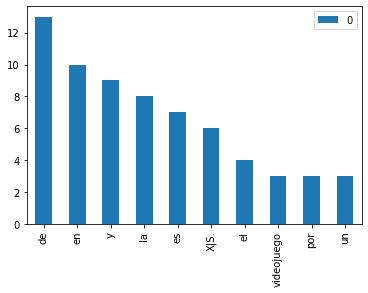

In [8]:
tabla = tabla.sort_values(0, ascending=False)
top10 = tabla.head(10)
top10.plot.bar()

1.8 ¿Qué puede observar de esta tabla de frecuencias? ¿Qué tipo de palabras fueron las que más se repitieron?

**Respuesta:** Conectores

1.9 Trate de eliminar alguna de estas palabras. Por ejemplo, colocando una restricción sobre el número de carácteres de las palabras y de nuevo haga la tabla de frecuencias y el gráfico de barras del top 10 de las palabras que más se repiten.

<AxesSubplot:>

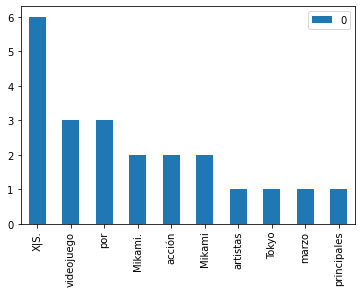

In [9]:
cleaned = [x for x in lista_texto if len(x)>2]
unicos = list(set(cleaned))
conteo = {}
for palabra in unicos:
    conteo[palabra] = len(re.findall(palabra, texto))
tabla = pd.DataFrame.from_dict(conteo, orient='index')
tabla = tabla.sort_values(0, ascending=False)
top10 = tabla.head(10)
top10.plot.bar()

1.10 Concluya sobre los puntos anteriores

**Respuesta:** Pocas palabras repetidas distintas a conectores

1.11 Ahora, realizaremos dos nubes de palabras

- Primero una pequeña nube de palabras a partir de la lista obtenida en el punto 1.9

- Segundo con la lista completa de palabras.

**¡Siga las instrucciones!**

a. Instale la librería ***wordcloud***

In [10]:
import sys
!conda install --yes --prefix {sys.prefix} wordcloud

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ ^C
failed with repodata from current_repodata.json, will retry with next repodata source.

CondaError: KeyboardInterrupt



b. Importe  *WordCloud*  e *ImageColorGenerator* que son las funciones para generar la nube de palabras y darle color a la misma.

In [11]:
from wordcloud import WordCloud #, ImageColorGenerator

c. Utilice el siguiente código para generar la nube de palabras

In [12]:
wordcloud = WordCloud(max_font_size=50,                            # tamaño de la fuente
                      max_words=100,                               # máximo de palabras en la nube
                      background_color="white").generate(texto)    # color de fondo y el método de generación

plt.figure(figsize=(10,10))                                        # tamaño del gráfico
plt.imshow(wordcloud)                                              # generación del gráfico
plt.axis("off")                                                    # para que no aparezcan los ejes
plt.show()

ValueError: Only supported for TrueType fonts

d. Realice otra nube cambiando algunos parámetros del código anterior. Por ejemplo, tamaño, número de palabras, etc. interpolation="bilinear"

2. Regresemos a la variable *texto* inicial. Observe que en el texto pueden aparecer carácteres que no son letras tales como:

- (.) Punto
- (,) Coma
- (@) Arroba
- (#) numeral
- (¿,?,!) Signos de admiración y de pregunta
- Entre otros.

¿En qué afectan estos signos al ejercicio anterior?

**Respuesta:**




¿Cómo podría eliminar carácteres especiales en el *texto*?

Usando expresiones regulares

<FONT SIZE=5 COLOR="purple"> 2. LIBRERÍAS PARA PROCESAMIENTO DE LENGUAJE NATURAL PLN </FONT>

Actualmente, existen diferentes librería que se usan para hacer procesamiento de texto y aplicar metodologías de procesamiento de lenguaje natural en general (PLN)

- **NLTK** (https://www.nltk.org/): Es una librería desarrollada por Steven Bird y Edward Loper para el Procesamiento de Lenguaje Natural, principalmente en inglés, que tiene herramientas para trabajar con: corpus, recursos léxicos, algoritmos de procesamiento de PLN, etc.

- **SpaCy** (https://spacy.io/): Es una librería para el NLP incorpora funcionalidades como Tokenización, Lematización, PoS, NER, etc. en varios idiomas. A diferencia de NLTK que tienen fines de caracter didáctico, SpaCy es más aplicado en la solución de problemas reales.

- **Gensim** (https://radimrehurek.com/gensim/) Es una librería muy útil para vectorización de textos, topic modeling, LDA, etc. Preprocesamiento, entre otras aplicaciones y procesos.

 A continuación, un resumen y comparativas entre diferentes librerías

 <br>

<center><img src="https://st11.ning.com/topology/rest/1.0/file/get/2808360875?profile=RESIZE_1024x1024" alt="centered image" width="550" height="700"></center> <center><figcaption> <FONT SIZE=1 COLOR="black"> Fuente: https://noeliagorod.com/2021/11/25/top-librerias-de-python-para-nlp-2/  </FONT> <figcaption></center>



<FONT SIZE=5 COLOR="purple"> 3. EXPRESIONES REGULARES </FONT>

- Es un modelo para búsqueda de coincidencias de texto.

- Es fundamental en la limpieza de texto para la eliminación de carácteres o búsquedas en texto.

- Podemos hacer búsqueda especificando el conjuntos de carácteres usando los corchetes [].

- Si usamos el símbolo "^" despues de "[" estaremos buscando los carácteres que no pertencen a la lista.

Veamos algunos ejemplos. Para profundizar en este tema y ver más posibilidades ver:

[*EXPRESIONES REGULARES* ▶ 🔎](https://developer.mozilla.org/es/docs/Web/JavaScript/Guide/Regular_expressions)



Iniciamos importante la librería *¨re*. Hay dos funciones claves:

1. ***findall***. Sirve para encontrar coincidencias de carácteres.

2- ***sub***. Sustituir carácteres por otros

In [13]:
import re

In [14]:
cadena = "El correo de Fabián Sánchez con código AP89504, es fabian.sanchez@urosario.edu.co y en twitter #PLN!!"

In [15]:
patron = "Fa"
re.findall(patron, cadena)
# Observe que se muestran todas las coincidencias de la cadena completa ya que esta dentro de las comilla "cadena"

['Fa']

**.** : punto --- cualquier carácter

**\s** : espacio en blanco
   
**\S** : cualquier carácter a excepción del espacio en blanco

In [16]:
patron = ".sa"
re.findall(patron, cadena)
# busca la cadena (cualquier elemento incluso el espacio) seguido de la "sa"

['.sa', 'osa']

In [17]:
patron = "\sFabián"
re.findall(patron, cadena)
# busca (espacio) más "Fabián" : observe que hay solo una coindicencia que corresponde a la palabra interna que tiene un espacio antes

[' Fabián']

In [18]:
patron = "\Sreo"
re.findall(patron, cadena)
# busca (espacio) más "Fabián" : observe que hay solo una coindicencia que corresponde a la palabra interna que tiene un espacio antes

['rreo']

"*" : indica la repetición de un carácter cero o más veces

"+" : indica la repetición de un carácter una o más veces

?   : Es el carácter o cuantificador *reacio*. Añadido a cualquiera de los anteriores se contará con la ocurrencia más corta posible.

In [19]:
patron = "Fabián*"
re.findall(patron, cadena)
# Buscar Fabia o Fabian o Fabiann ...

['Fabián']

In [20]:
patron = "Fabián+"
re.findall(patron, cadena)
# Buscar Fabian o Fabiann o Fabiannnn...

['Fabián']

Veamos los siguientes ejemplos

In [21]:
patron = "\Sn"
re.findall(patron, cadena)
# Busca así: (cualquier caracter (sin espacio) muchas veces).. h.. (cualquiera)..h..h

['án', 'án', 'on', 'an', 'an', 'en']

In [22]:
patron = "\S*n"
re.findall(patron, cadena)
# Busca así: (cualquier caracter (sin espacio) muchas veces).. h.. (cualquiera)..h..h

['Fabián', 'Sán', 'con', 'fabian.san', 'en']

In [23]:
patron = "\S*?n"
re.findall(patron, cadena)
# Busca así: (cualquier caracter (sin espacio) muchas veces).. h.. (cualquiera)..h..h

['Fabián', 'Sán', 'con', 'fabian', '.san', 'en']

¿Cómo hacemos para extraer el correo de la oración?

In [27]:
patron = "\S*@\S*.co"
re.findall(patron, cadena)

['fabian.sanchez@urosario.edu.co']

**[ ]** : cualquiera de los caracteres especificados

**[ ^ ]**  : al inicio de [] es la negación

In [28]:
patron = "[Fa]"
re.findall(patron, cadena)
# Busca las "F" y las "a", es decir, busca lo que esta adentro individualmente

['F', 'a', 'a', 'a', 'a', 'a']

In [29]:
patron = "[^Fa]"
re.findall(patron, cadena)
# Busca los otros caracteres que no son F o a

['E',
 'l',
 ' ',
 'c',
 'o',
 'r',
 'r',
 'e',
 'o',
 ' ',
 'd',
 'e',
 ' ',
 'b',
 'i',
 'á',
 'n',
 ' ',
 'S',
 'á',
 'n',
 'c',
 'h',
 'e',
 'z',
 ' ',
 'c',
 'o',
 'n',
 ' ',
 'c',
 'ó',
 'd',
 'i',
 'g',
 'o',
 ' ',
 'A',
 'P',
 '8',
 '9',
 '5',
 '0',
 '4',
 ',',
 ' ',
 'e',
 's',
 ' ',
 'f',
 'b',
 'i',
 'n',
 '.',
 's',
 'n',
 'c',
 'h',
 'e',
 'z',
 '@',
 'u',
 'r',
 'o',
 's',
 'r',
 'i',
 'o',
 '.',
 'e',
 'd',
 'u',
 '.',
 'c',
 'o',
 ' ',
 'y',
 ' ',
 'e',
 'n',
 ' ',
 't',
 'w',
 'i',
 't',
 't',
 'e',
 'r',
 ' ',
 '#',
 'P',
 'L',
 'N',
 '!',
 '!']

In [30]:
patron = "[Ff]abian"
re.findall(patron, cadena)
# Busca Fabian y fabian

['fabian']

***Expresiones importantes***

- "[A-Z0-9]"
- "[^A-Za-z0-9óáéíúñ]"

In [31]:
patron = "[A-Z]"
re.findall(patron, cadena)
# Busca Fabian y fabian

['E', 'F', 'S', 'A', 'P', 'P', 'L', 'N']

In [32]:
patron = "[A-Z]+"
re.findall(patron, cadena)
# Busca Fabian y fabian



['E', 'F', 'S', 'AP', 'PLN']

In [33]:
patron = "[A-Za-z]+"
re.findall(patron, cadena)
# Busca Fabian y fabian

['El',
 'correo',
 'de',
 'Fabi',
 'n',
 'S',
 'nchez',
 'con',
 'c',
 'digo',
 'AP',
 'es',
 'fabian',
 'sanchez',
 'urosario',
 'edu',
 'co',
 'y',
 'en',
 'twitter',
 'PLN']

In [34]:
patron = "[A-Za-z0-9óáéíú]+"
re.findall(patron, cadena)
# Busca Fabian y fabian

['El',
 'correo',
 'de',
 'Fabián',
 'Sánchez',
 'con',
 'código',
 'AP89504',
 'es',
 'fabian',
 'sanchez',
 'urosario',
 'edu',
 'co',
 'y',
 'en',
 'twitter',
 'PLN']

Ahora bien, usaremos la instrucción *sub* para sustituir carácteres.

In [35]:
cadena2 = re.sub ("[^A-Za-z0-9óáéíúñ]+"," ",cadena)
cadena2

'El correo de Fabián Sánchez con código AP89504 es fabian sanchez urosario edu co y en twitter PLN '

¿Qué efecto tiene la expresión anterior?

<FONT SIZE=5 COLOR="purple"> 4. TOKENIZACIÓN </FONT>

- Es el proceso de dividir las cadenas de texto de un documento en piezas más pequeñas que se denominan *tokens*.

- La librería NTKL tiene funciones para hacer la tokenización de textos.

Importaremos la librería al espacio de trabajo y la función *word_tokenize*

In [36]:
import nltk
# separa cuando encuentra espacio y carácteres especiales
from nltk import word_tokenize
# separa cuando encuentra espacio y punto
from nltk.tokenize import wordpunct_tokenize

In [37]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to
[nltk_data]    |     /home/estudi

[nltk_data]    |   Unzipping corpora/opinion_lexicon.zip.
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping corpora/paradigms.zip.
[nltk_data]    | Downloading package pe08 to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping corpora/pe08.zip.
[nltk_data]    | Downloading package perluniprops to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping misc/perluniprops.zip.
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping corpora/pil.zip.
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     /home/estudiantes/nltk_data...
[nltk_data]    |   Unzipping corpora/pl196x.zip.
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     /home/estudiantes

True

Veamos dos ejemplos con las cadenas de texto que hemos abordado.

In [38]:
words_cadena = nltk.word_tokenize(cadena)
words_cadena

['El',
 'correo',
 'de',
 'Fabián',
 'Sánchez',
 'con',
 'código',
 'AP89504',
 ',',
 'es',
 'fabian.sanchez',
 '@',
 'urosario.edu.co',
 'y',
 'en',
 'twitter',
 '#',
 'PLN',
 '!',
 '!']

In [39]:
nltk.wordpunct_tokenize(cadena)

['El',
 'correo',
 'de',
 'Fabián',
 'Sánchez',
 'con',
 'código',
 'AP89504',
 ',',
 'es',
 'fabian',
 '.',
 'sanchez',
 '@',
 'urosario',
 '.',
 'edu',
 '.',
 'co',
 'y',
 'en',
 'twitter',
 '#',
 'PLN',
 '!!']

In [40]:
words_texto = nltk.word_tokenize(texto)
words_texto

['Ghostwire',
 ':',
 'Tokyo',
 'es',
 'un',
 'videojuego',
 'de',
 'terror',
 'y',
 'acción',
 'japonés',
 'perteneciente',
 'al',
 'género',
 'de',
 'acción',
 'y',
 'aventura',
 'desarrollado',
 'por',
 'la',
 'empresa',
 'Tango',
 'Gameworks',
 ',',
 'el',
 'videojuego',
 'es',
 'la',
 'más',
 'reciente',
 'entrega',
 'dirigida',
 'por',
 'Ikumi',
 'Nakamura',
 ',',
 'una',
 'de',
 'las',
 'artistas',
 'principales',
 'en',
 'videojuegos',
 'como',
 'Okami',
 ',',
 'Bayonetta',
 ',',
 'The',
 'Evil',
 'Within',
 'y',
 'es',
 'considerada',
 'la',
 'discípula',
 'de',
 'Shinki',
 'Mikami',
 '.',
 'Fue',
 'anunciado',
 'por',
 'Mikami',
 'en',
 'el',
 'año',
 '2019',
 ',',
 'y',
 'su',
 'lanzamiento',
 'se',
 'produjo',
 'el',
 '25',
 'de',
 'marzo',
 'de',
 '2022',
 'en',
 'PlayStation',
 '5',
 'y',
 'Microsoft',
 'Windows',
 'y',
 'el',
 '12',
 'de',
 'abril',
 'de',
 '2023',
 'en',
 'Xbox',
 'Series',
 'X|S',
 '.']

<FONT SIZE=5 COLOR="purple"> 5. STOP WORDS </FONT>

- Son palabras que no aportan al significado de la oraciones : preprosiciones, conjunciones, adverbios, artículos, etc.

- NLTK tiene para una serie de idiomas un listado de Stop Words.

- Podemos crear nuestra propia bolsa de palabras dependiendo del lenguaje y contexto.


In [41]:
from nltk.corpus import stopwords

Bolsa de palabras de inglés

In [42]:
print(set(stopwords.words("english")))

{'ourselves', 'this', "you'd", 'where', 'll', 'while', 'our', 'won', 'o', 'will', 'have', 's', 'further', 'which', 'they', 'those', 'against', 'any', 'only', 'too', 'a', 'or', "needn't", "you're", 'needn', 'do', 'of', 'theirs', 'had', "shouldn't", 're', "it's", 'yours', 'itself', 'during', 'why', "doesn't", 'because', 'each', 'not', 'up', 'here', 'them', 'at', 'on', 'such', 'were', "you've", "that'll", 'you', 'until', 'are', 'between', 'it', 'haven', 'whom', 'hadn', 'its', 'same', 'that', 'wouldn', "isn't", "she's", 'before', 'my', 'hers', 'in', 'an', "mustn't", 'yourself', 'and', 'myself', 'above', 'once', 'by', 'again', 'own', 'very', 've', 'aren', 'having', 'just', 'yourselves', 'wasn', 'we', "won't", "couldn't", 'm', 'didn', 'he', 'than', 'herself', 'after', 'd', "hasn't", "haven't", "weren't", 'ours', 'to', "wouldn't", 'doing', 'been', 'him', 'ain', 'now', 'himself', 'nor', 'more', 'shan', "hadn't", 'his', 'isn', 'all', "shan't", 'how', 'who', 'the', 'off', "should've", 'their', '

Bolsa de palabras en español

In [43]:
print(set(stopwords.words("spanish")))

{'tuya', 'fuésemos', 'estuvieras', 'o', 'serían', 'estén', 'tendré', 'tenían', 'tenías', 'seamos', 'estaban', 'más', 'se', 'hubimos', 'suyo', 'mías', 'estuviera', 'tienes', 'el', 'habidos', 'estaba', 'estuviste', 'hubieron', 'otras', 'nos', 'fueras', 'sentida', 'habrán', 'sois', 'tuvisteis', 'habría', 'ella', 'estarás', 'vuestra', 'tendríamos', 'vosotros', 'qué', 'habiendo', 'la', 'en', 'habidas', 'eres', 'ti', 'habida', 'seréis', 'tuvieran', 'otros', 'te', 'habías', 'desde', 'entre', 'tuyos', 'tuvo', 'su', 'fuese', 'tenéis', 'tengo', 'del', 'porque', 'fuisteis', 'tened', 'tenidas', 'tendréis', 'tendría', 'estuviese', 'había', 'hubieses', 'haya', 'estuvieseis', 'seré', 'hayas', 'estaremos', 'míos', 'fuimos', 'los', 'sería', 'antes', 'todos', 'donde', 'sentidos', 'teníais', 'él', 'sean', 'estuvimos', 'tendrá', 'hayamos', 'quien', 'hubiera', 'eran', 'tuviesen', 'tu', 'nosotras', 'a', 'estemos', 'teniendo', 'como', 'tuviéramos', 'tenida', 'sus', 'tendremos', 'estéis', 'estadas', 'estada',

Veamos un ejemplo

In [44]:
doc = "Un radar multa a Fabian Sanchez por conducir demasiado rapido en la autopista"
words = nltk.word_tokenize(doc)
for word in words:
        if word in stopwords.words('spanish'):
            print (word)

a
por
en
la
